In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_comp_salary_19-20')

In [3]:
qbs.dtypes

NAME          object
COMP           int64
COMP_rank    float64
salary         int64
dtype: object

In [4]:
qbs.head()

,NAME,COMP,COMP_rank,salary
0,Matt Ryan,408,1.0,30000000
1,Carson Wentz,388,3.5,32000000
2,Tom Brady,373,6.0,23000000
3,Jared Goff,368,7.0,33500000
4,Derek Carr,361,8.0,25000000


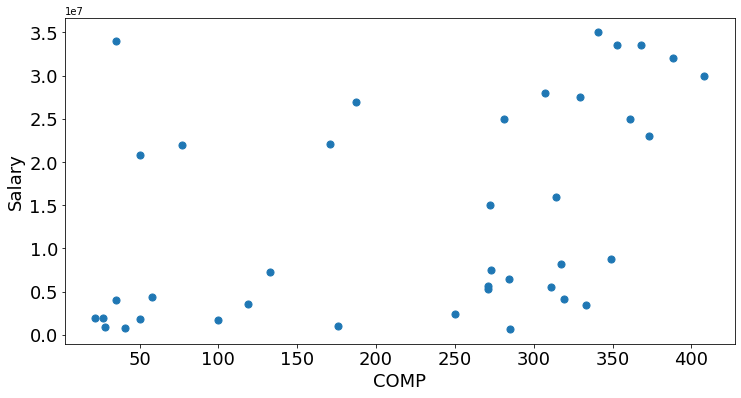

In [5]:
ax = qbs.plot(kind="scatter", x = 'COMP',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('COMP', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['COMP', 'salary']])

In [7]:
X.mean(axis = 0)

array([-3.41607085e-17,  0.00000000e+00])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.93347123,  0.95424732],
       [ 0.83113558,  0.86261747],
       [-1.18827515, -0.92644786],
       [ 0.57124755, -0.64292131],
       [ 1.17931974,  1.59180814]])

In [11]:
km.predict(X)

array([4, 4, 1, 4, 1, 4, 3, 4, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,COMP,COMP_rank,salary,clusters
0,Matt Ryan,408,1.0,30000000,4
1,Carson Wentz,388,3.5,32000000,4
2,Tom Brady,373,6.0,23000000,1
3,Jared Goff,368,7.0,33500000,4
4,Derek Carr,361,8.0,25000000,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[1.04000000e+02, 2.51786666e+07],
       [3.27500000e+02, 2.40833333e+07],
       [7.17272727e+01, 2.69703918e+06],
       [2.94583333e+02, 6.08628492e+06],
       [3.71600000e+02, 3.28000000e+07]])

In [14]:
qbs.groupby('clusters')[['COMP', 'salary']].mean()

,COMP,salary
clusters,,
0,104.000000,2.517867e+07
1,327.500000,2.408333e+07
2,71.727273,2.697039e+06
3,294.583333,6.086285e+06
4,371.600000,3.280000e+07


In [15]:
centroids = qbs.groupby('clusters')[['COMP', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

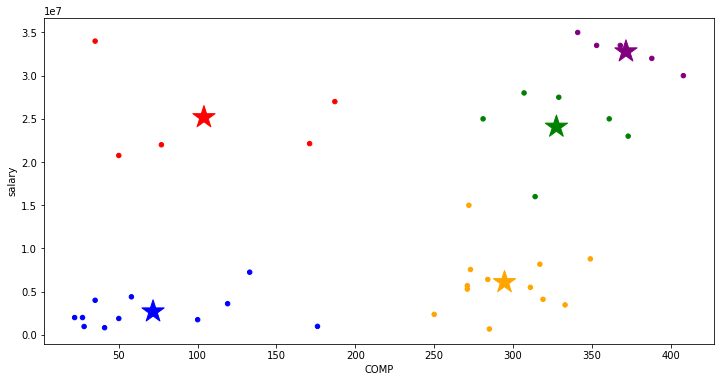

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'COMP', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'COMP', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

7.008208089250848

In [18]:
silhouette_score(X, km.labels_)

0.5547005957049679